In [10]:
import nn
import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/io/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv('./mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.isnull().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
df.duplicated().sum()


0

In [8]:
X = df.drop('class', axis=1)
y = pd.DataFrame(df['class'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=34)

In [11]:
def feature_distr(df):
    for feature in df.columns:
        if df[feature].dtype == 'O':
            sns.countplot(x=feature, data=df)
        elif df[feature].dtype in ['int_', 'int8', 'int16', 'int32', 'int64', 'uint8', 'uint16',
                                   'uint32', 'uint64', 'float_', 'float16', 'float32', 'float64']:
            sns.displot(df[feature].dropna(), bins=40)
        plt.show()

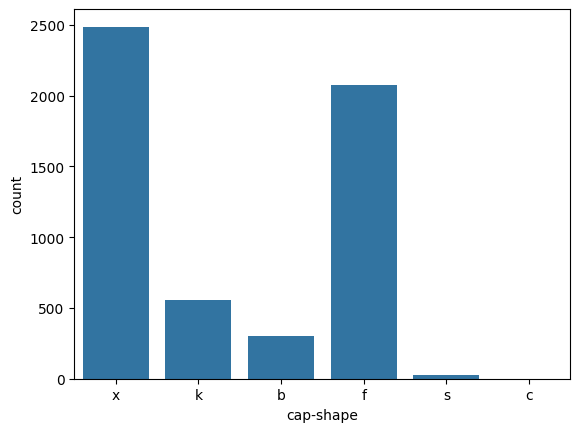

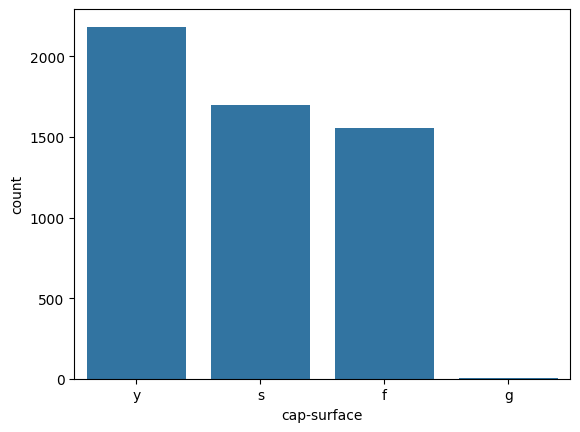

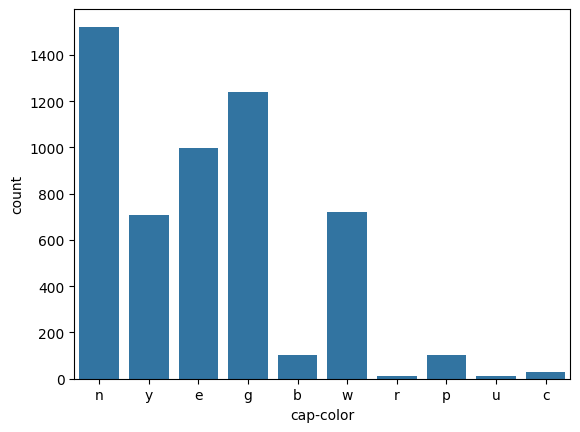

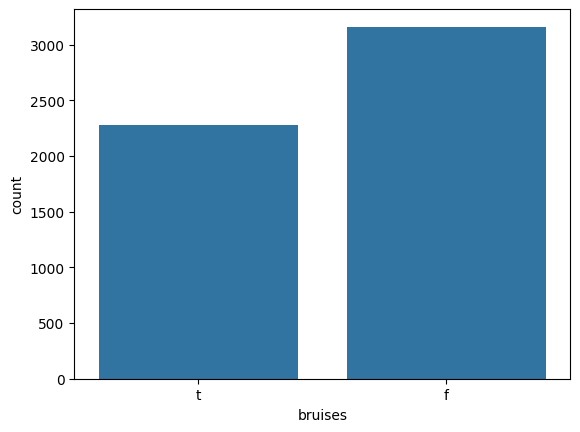

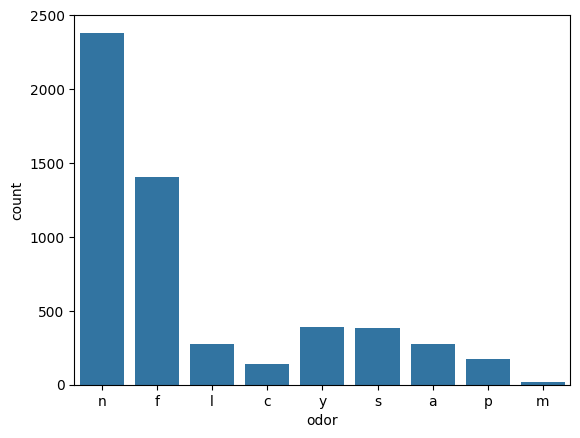

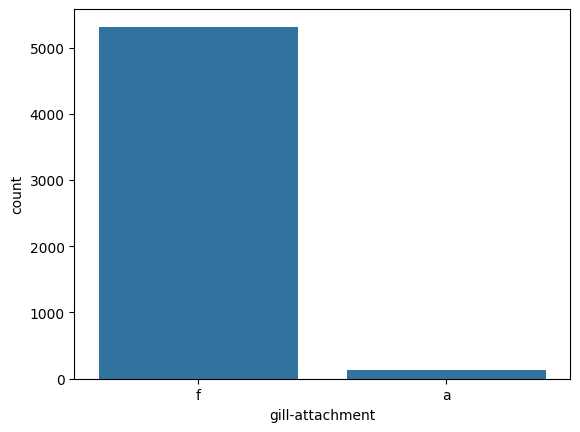

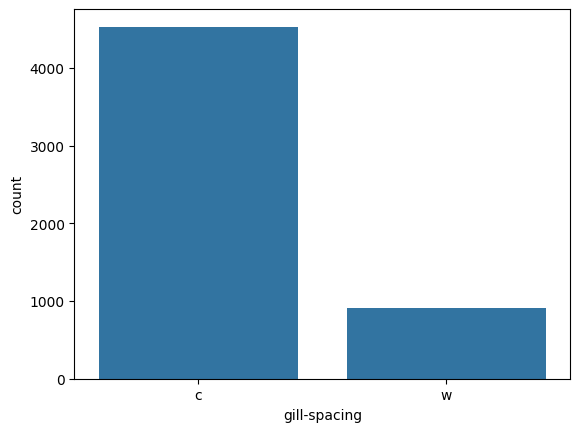

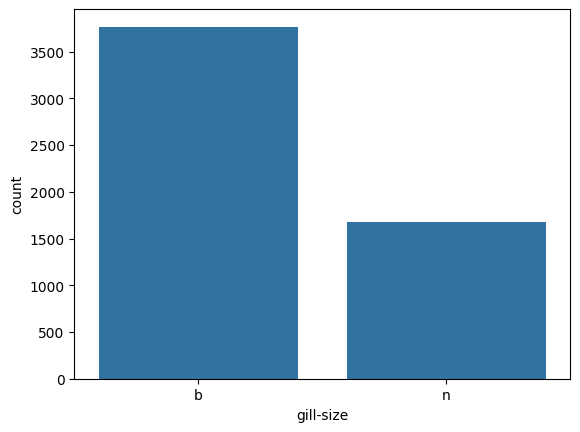

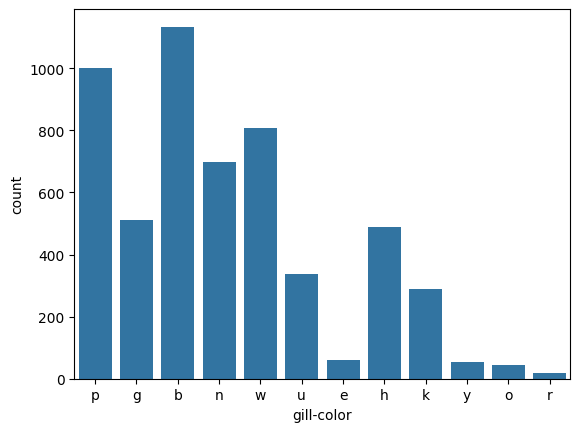

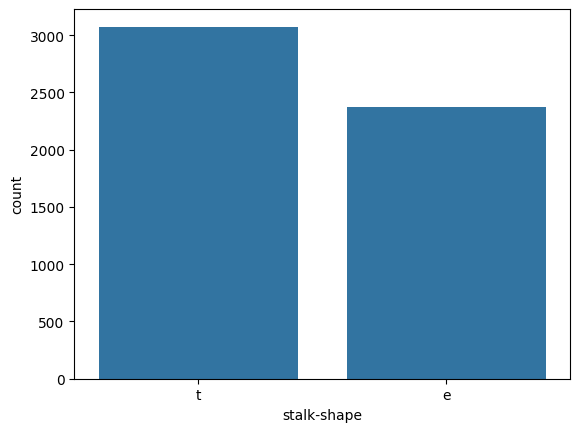

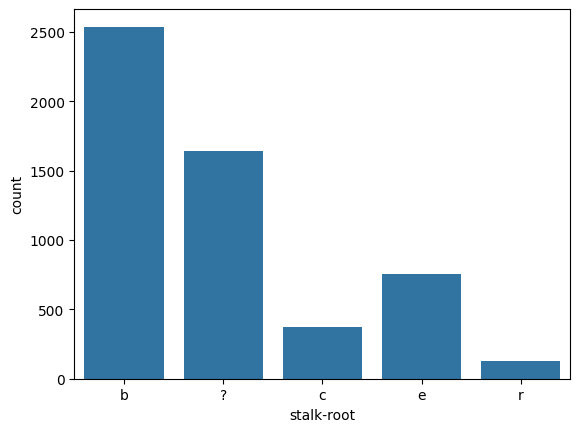

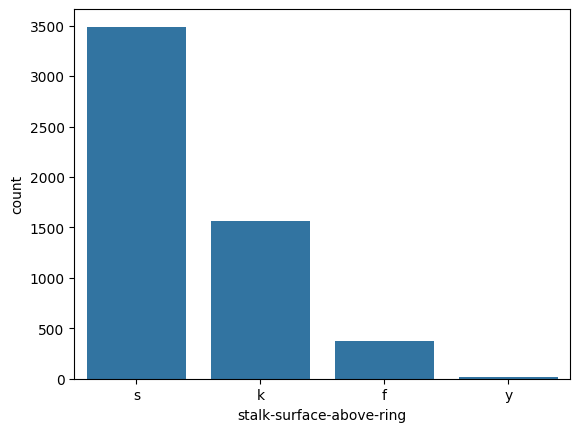

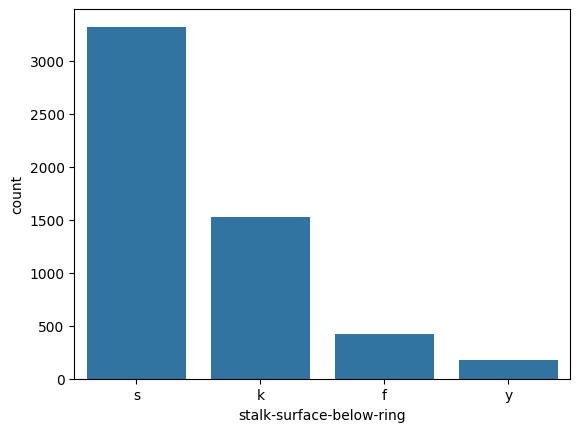

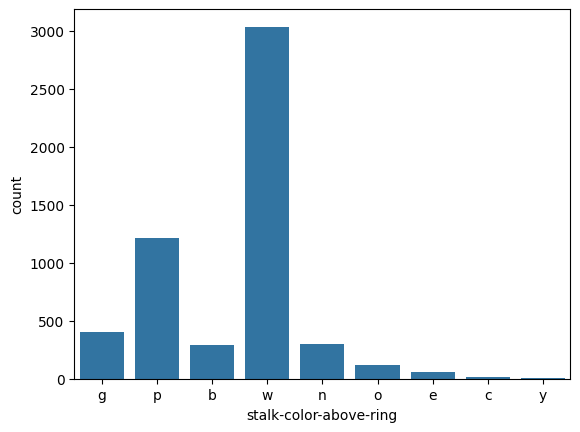

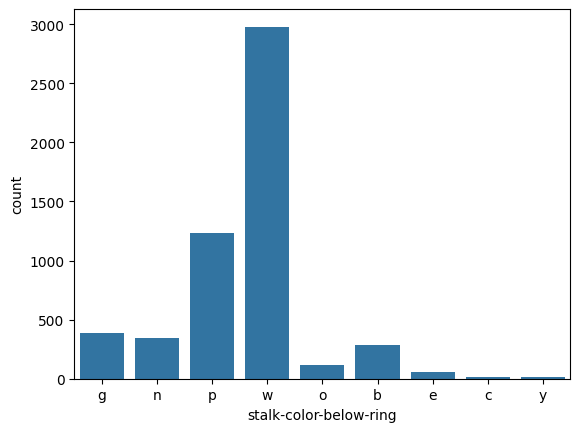

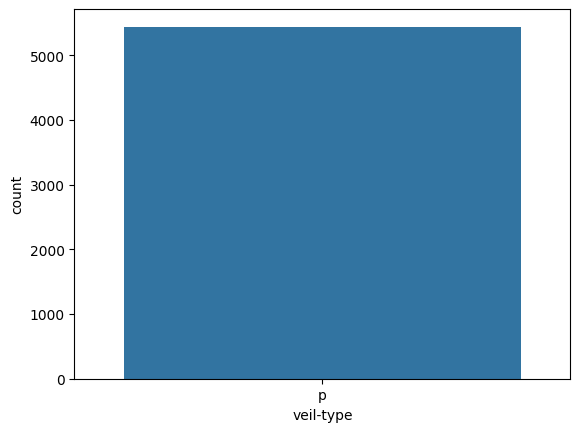

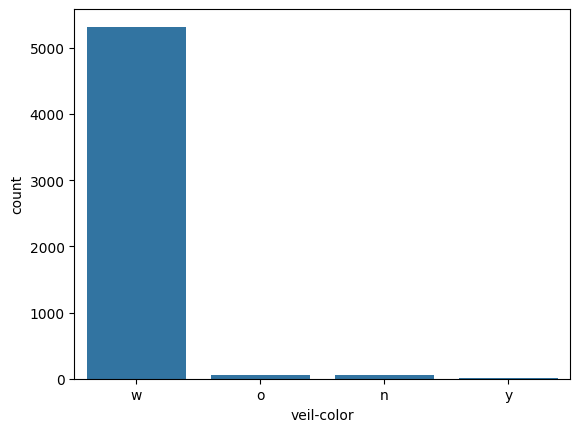

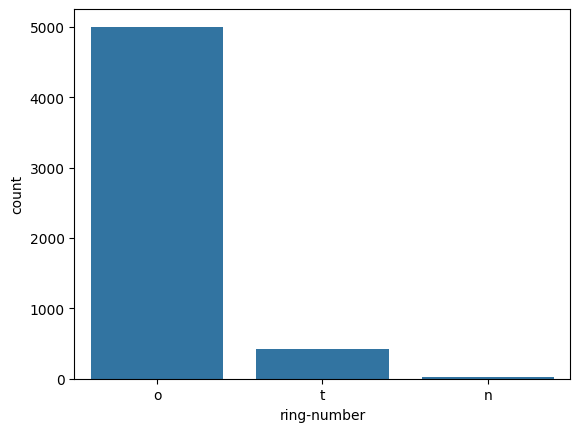

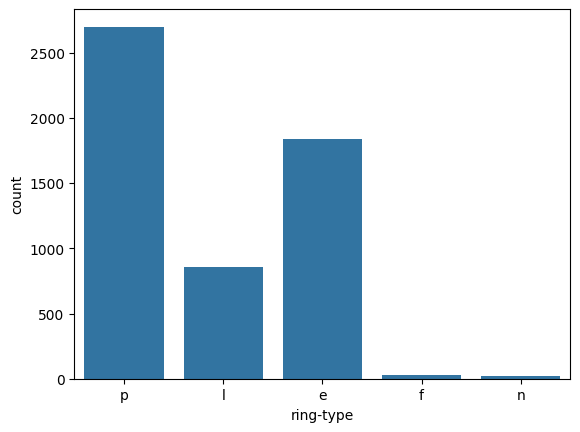

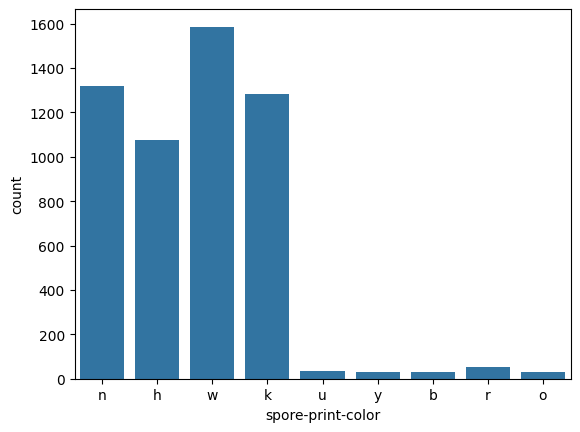

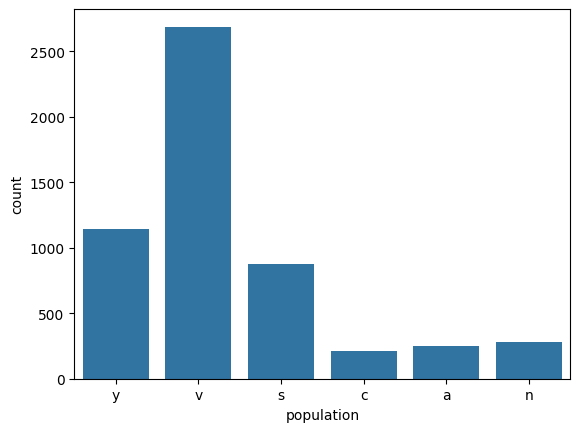

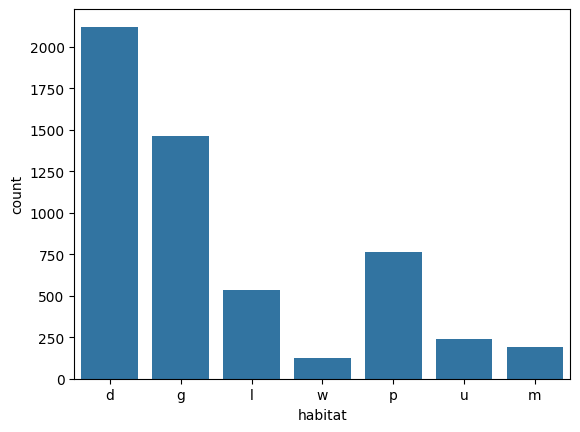

In [15]:
feature_distr(X_train)


In [19]:
columns_to_drop = ["gill-attachment",
                   "gill-spacing",
                   "ring-number",
                   "veil-color",
                   "veil-type", ]

In [20]:
X_train = X_train.drop(columns=columns_to_drop)
X_train.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')

In [18]:
X_train.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
encoder = OneHotEncoder()

encoder.fit(X_train)
X_act_train = encoder.transform(X_train)

In [28]:
y_train[y_train == 'p'] = 1
y_train[y_train == 'e'] = 0

y_train = y_train.astype("float32")

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20)

rf.fit(X_act_train, y_train)

/home/io/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=20)

In [40]:
feature_imp = pd.Series(rf.feature_importances_)
feature_imp.sort_values(ascending=False)


27     0.604089
49     0.189494
51     0.051539
59     0.049621
88     0.037698
         ...   
38     0.000000
37     0.000000
36     0.000000
35     0.000000
104    0.000000
Length: 105, dtype: float64

<Axes: >

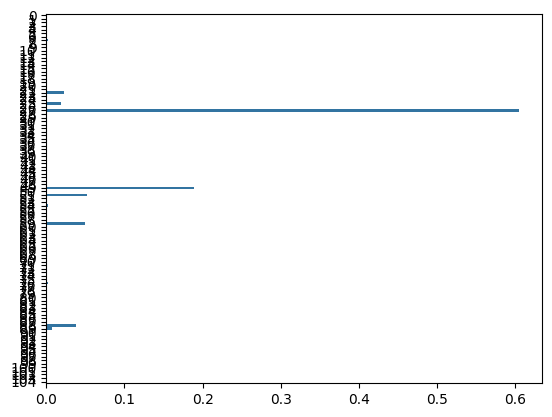

In [41]:
sns.barplot(pd.Series(feature_imp), orient='h')


In [42]:
features = [82, 98, 64, 77, 7, 76, 54, 89, 25, 22, 88, 59, 51, 49, 27]

In [43]:
X_train_numpy = X_act_train.toarray()

In [44]:
X_train_numpy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [45]:
X_train_numpy[:, features]

array([[1., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 1.]])

In [46]:
y_train_numpy = y_train.to_numpy()

In [47]:
model = nn.Model([
    nn.Linear(15, 15),
    nn.Relu(),
    nn.Linear(15, 1),
    nn.Sigmoid(),
])

In [48]:
def train(model: nn.Model, loss: nn.LossFunction, opt: nn.Optimizer, X, Y, i_max=10, eps=1e-3):
    for i in range(i_max):

        y_p = model.forward(X)

        loss_val = loss.calc_loss(Y, y_p)
        grad = loss.calc_gradient(Y, y_p)
        model.backward(grad)

        opt.do_step(model)
        model.zerograd()

        if loss_val <= eps:
            break

In [49]:
def test(model: nn.Model, metric: metrics.Metric, X, Y):
    y_p = model.forward(X)
    return metric.calc_loss(Y, y_p)

AttributeError: module 'nn' has no attribute 'Metric'